In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.io import arff
import warnings
warnings.filterwarnings('ignore')

In [2]:
data, meta = arff.loadarff('php0iVrYT.arff')

In [3]:
columns_names_dict = {
    'V1': 'MonthsSinceLastDonation',
    'V2': 'TotalDonations',
    'V3': 'TotalBloodDonated',
    'V4': 'MonthsSinceFirstDonation',
    'Class': 'WasAtMarch2007'
}

df = pd.DataFrame(data=data)
df.rename(columns=columns_names_dict, inplace=True)
df.head()

,MonthsSinceLastDonation,TotalDonations,TotalBloodDonated,MonthsSinceFirstDonation,WasAtMarch2007
0,2.0,50.0,12500.0,98.0,b'2'
1,0.0,13.0,3250.0,28.0,b'2'
2,1.0,16.0,4000.0,35.0,b'2'
3,2.0,20.0,5000.0,45.0,b'2'
4,1.0,24.0,6000.0,77.0,b'1'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MonthsSinceLastDonation   748 non-null    float64
 1   TotalDonations            748 non-null    float64
 2   TotalBloodDonated         748 non-null    float64
 3   MonthsSinceFirstDonation  748 non-null    float64
 4   WasAtMarch2007            748 non-null    object 
dtypes: float64(4), object(1)
memory usage: 29.3+ KB


In [5]:
df

,MonthsSinceLastDonation,TotalDonations,TotalBloodDonated,MonthsSinceFirstDonation,WasAtMarch2007
0,2.0,50.0,12500.0,98.0,b'2'
1,0.0,13.0,3250.0,28.0,b'2'
2,1.0,16.0,4000.0,35.0,b'2'
3,2.0,20.0,5000.0,45.0,b'2'
4,1.0,24.0,6000.0,77.0,b'1'
...,...,...,...,...,...
743,23.0,2.0,500.0,38.0,b'1'
744,21.0,2.0,500.0,52.0,b'1'
745,23.0,3.0,750.0,62.0,b'1'
746,39.0,1.0,250.0,39.0,b'1'


In [6]:
df['WasAtMarch2007'] = pd.to_numeric(df['WasAtMarch2007']).apply(lambda x: x - 1)
df['MonthsSinceFirstDonation'] = df['MonthsSinceFirstDonation'].astype(int)
df['TotalDonations'] = df['TotalDonations'].astype(int)
df['TotalBloodDonated'] = df['TotalBloodDonated'].astype(int)
df['MonthsSinceLastDonation'] = df['MonthsSinceLastDonation'].astype(int)


In [7]:
df.isnull().sum()

MonthsSinceLastDonation     0
TotalDonations              0
TotalBloodDonated           0
MonthsSinceFirstDonation    0
WasAtMarch2007              0
dtype: int64

<Axes: xlabel='MonthsSinceLastDonation', ylabel='WasAtMarch2007'>

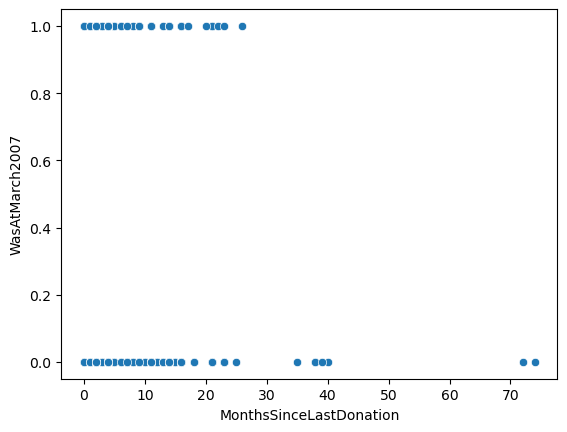

In [8]:
sns.scatterplot(data=df, x='MonthsSinceLastDonation', y='WasAtMarch2007')

<Axes: xlabel='TotalDonations', ylabel='WasAtMarch2007'>

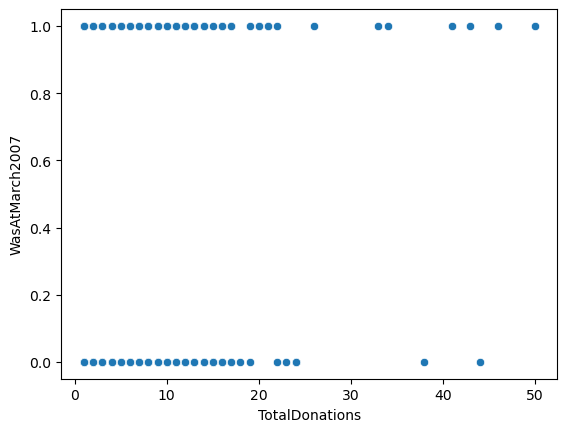

In [9]:
sns.scatterplot(data=df, x='TotalDonations', y='WasAtMarch2007')

<Axes: >

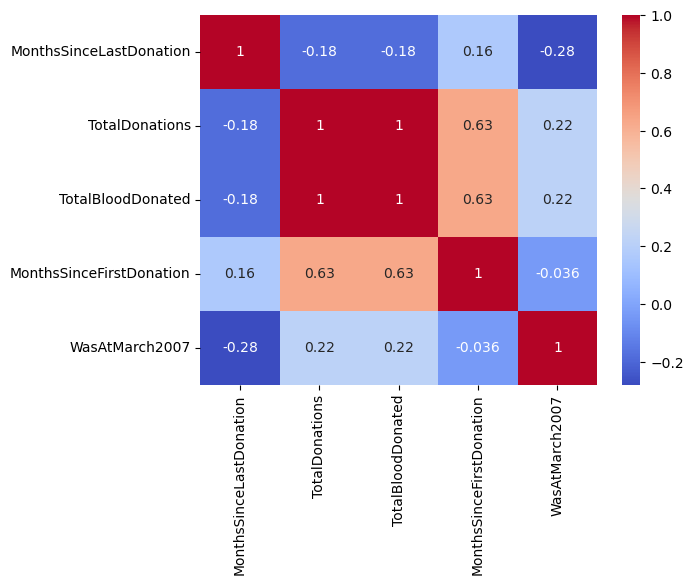

In [10]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

In [11]:
df = df.drop(columns='TotalBloodDonated')

<Axes: xlabel='MonthsSinceLastDonation', ylabel='Count'>

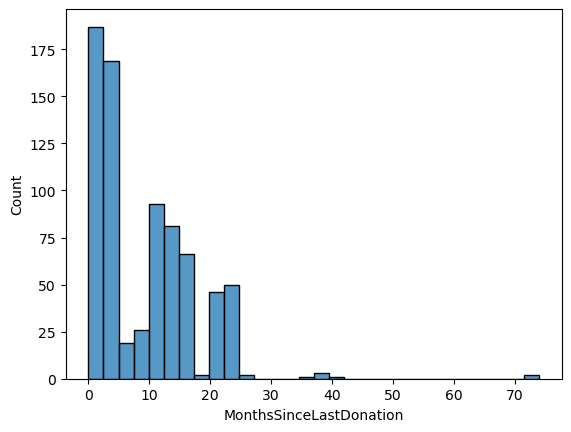

In [12]:
sns.histplot(df, x='MonthsSinceLastDonation')

<Axes: xlabel='MonthsSinceLastDonationLog', ylabel='Count'>

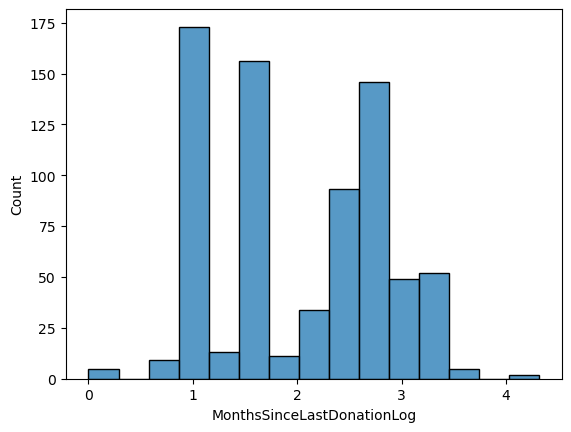

In [13]:
df = df.assign(MonthsSinceLastDonationLog=lambda x: np.log1p(x['MonthsSinceLastDonation']))

sns.histplot(df, x='MonthsSinceLastDonationLog')

<Axes: xlabel='TotalDonations', ylabel='Count'>

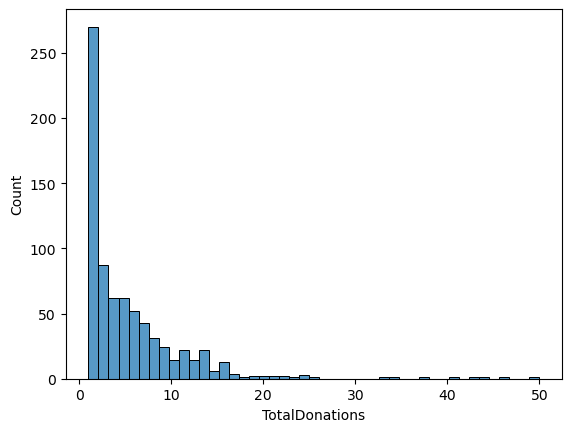

In [14]:
sns.histplot(df, x='TotalDonations')

<Axes: xlabel='TotalDonationsLog', ylabel='Count'>

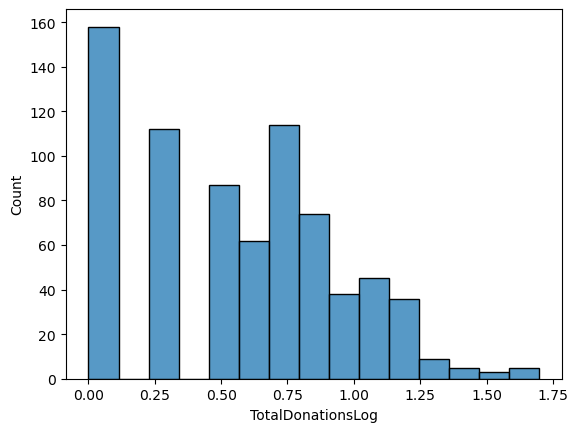

In [15]:
x = df['TotalDonations'].copy()
df['TotalDonationsLog'] = np.log10(x)

sns.histplot(df['TotalDonationsLog'])

<Axes: xlabel='MonthsSinceFirstDonation', ylabel='Count'>

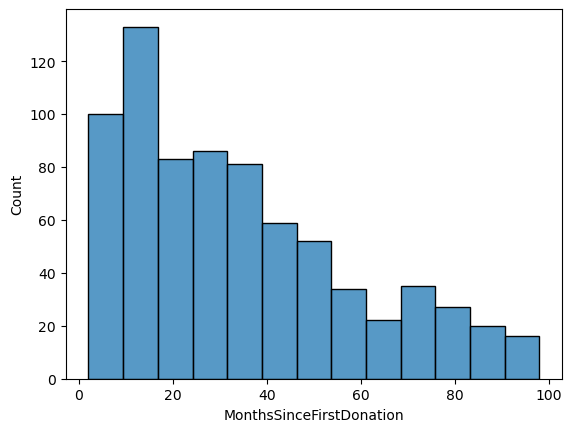

In [16]:
x = df['MonthsSinceFirstDonation'].copy()
# x = np.log(df['MonthsSinceFirstDonation'])
# x = (x-x.mean()) / x.std()
# x = np.sqrt(x)
sns.histplot(x)

In [17]:
df['MonthsSinceFirstDonationLog'] = np.log1p(df['MonthsSinceFirstDonation'])

In [18]:
target = 'WasAtMarch2007'
X_cols = ['MonthsSinceLastDonationLog', 'MonthsSinceFirstDonationLog', 'TotalDonationsLog']

X = df[X_cols]
y = df[target]
df_res = df[X_cols + [target]]

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

param_grid_rfc = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [15, 20],
    'min_samples_leaf': [1, 10, 12]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=.2)

rfc = RandomForestClassifier(random_state=24)
rfc_cv = GridSearchCV(rfc, param_grid_rfc, cv=5, n_jobs=-1).fit(X_train, y_train)

In [20]:
rfc_cv.score(X_test, y_test)

0.8133333333333334

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
   random_state=42
).fit(X_train, y_train)

lr.score(X_test, y_test)


0.78

In [22]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dct = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [15, 20],
    'min_samples_leaf': [1, 10, 12]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=.2)

dct = DecisionTreeClassifier(random_state=24).fit(X_train, y_train)
dct_cv = GridSearchCV(dct, param_grid_dct, cv=5, n_jobs=-1).fit(X_train, y_train)

In [23]:
dct.score(X_test, y_test)

0.72